In [42]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [43]:
class QuadState(TypedDict):

    a:int
    b:int
    c:int
    equation:str
    discriminant:float
    result:str

In [44]:
import math

def show_equation(state:QuadState)->QuadState:
    equation=f"{state['a']}x^2{state['b']}x{state['c']}"

    return {"equation":equation}


def cal_discriminant(state:QuadState)->QuadState:
    a=state['a']
    b=state['b']
    c=state['c']
    discriminant=b**2- (4*a*c)

    return{'discriminant':discriminant}

In [45]:
def no_real_roots(state:QuadState)->QuadState:
    result=f"No real roots"
    return {"result":result}




def real_roots(state:QuadState)->QuadState:
    root1=(-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2=(-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    result=f"The roots are {root1} and {root2}"

    return {"result":result}

def repeated_roots(state:QuadState)->QuadState:
    root =(-state['b'])/(2*state['a'])
    result=f"Only repeating roots are {root}"

    return {'result':result}

def check_condition(state:QuadState)->Literal["real_roots","repeated_roots","no_real_roots"]:
    if state['discriminant']> 0:
        return "real_roots"
    elif state['discriminant']==0:
        return "repeated_roots"
    else:
        return "no_real_roots"



In [46]:
graph=StateGraph(QuadState)

##NODES
graph.add_node("show_equation",show_equation)
graph.add_node("cal_discriminant",cal_discriminant)
graph.add_node("no_real_roots",no_real_roots)
graph.add_node("real_roots",real_roots)
graph.add_node("repeated_roots",repeated_roots)

graph.add_edge(START,"show_equation")
graph.add_edge('show_equation',"cal_discriminant")
graph.add_conditional_edges('cal_discriminant',check_condition)
graph.add_edge("no_real_roots",END)
graph.add_edge("real_roots",END)
graph.add_edge("repeated_roots",END)






workflow=graph.compile()

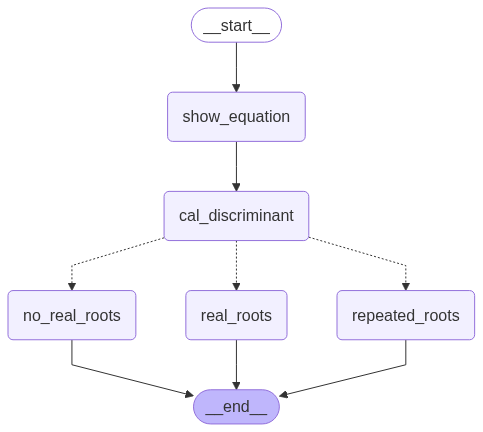

In [47]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [49]:
##Execution
initial_state={
    "a":4,
    "b":-6,
    "c":-8
}

workflow.invoke(initial_state)


{'a': 4,
 'b': -6,
 'c': -8,
 'equation': '4x^2-6x-8',
 'discriminant': 164,
 'result': 'The roots are 2.350781059358212 and -0.8507810593582121'}